In [1]:
import gym
import numpy as np
import pandas
import matplotlib.pyplot as plt
import gym_map_bro
import toy_agents

env = gym.make('map-bro-v0')
env.__myinit__()

np.random.seed(0)

# Variable initialization for manual looping
loop = 0

# Variables for keeping track of total values over time
vals = np.array([0,0])
t = 0

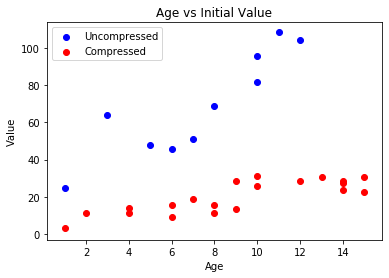

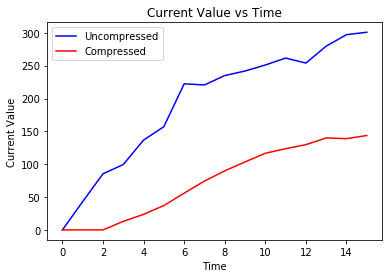

Uncompressed Database:
                  uid              src  sport   age       value
0    CFHwOcUAkavh7LyG   192.168.202.71    137   7.0   51.317237
1  C4F9iD4fRoaSpcqFvh   192.168.202.93  61591   1.0   24.595670
2    CFHwOcUAkavh7LyG   192.168.202.71    137   6.0   45.610276
3  CSNwDv1HYrBbBE9h05  192.168.202.102    137  12.0  104.479932
4  COkLoK28WVSMFQDL2a   192.168.202.93  61184  10.0   81.516622
5   CT6ScvybqNfoWT8Eg   192.168.202.76    137   3.0   64.068657
6   CC4LboWagnJjCpDmk   192.168.202.89    137   5.0   47.948295
7  CBLo2e1Z1rYW9eZTmd   192.168.202.93  60821  11.0  108.398415
8    CFHwOcUAkavh7LyG   192.168.202.71    137   8.0   68.601260
9  C29nMH13BHWJjTVzz4   192.168.202.97  59011  10.0   95.852568
Compressed Database:
                   uid              src  sport   age      value
0     CP0GkVYOcUStxcH8   192.168.202.89    137   4.0  13.942812
1   CSNwDv1HYrBbBE9h05  192.168.202.102    137  12.0  28.582691
2     CFHwOcUAkavh7LyG   192.168.202.71    137   7.0  18.758

0

In [16]:
# This cell can be run repeatedly to import new batches from a bro file

# New batch of 5 lines, here represented by 5 random values
batch = pandas.read_csv("dns.log", header=loop)
values = np.random.exponential([10.0, 10.0, 10.0, 10.0, 10.0])
loop += 5

toy_agents.batch_load(env, batch, values)

vals = np.vstack((vals, np.array([np.sum(env.values0_init[:,1]),np.sum(env.values1_init[:,1])])))
t += 1

env.render(out=0)

sub = plt.subplot()
sub.plot(np.arange(t+1),vals[:,0], c = 'b', label = 'Uncompressed')
sub.plot(np.arange(t+1),vals[:,1], c = 'r', label = 'Compressed')
sub.set_title('Current Value vs Time')
sub.set_xlabel('Time')
sub.set_ylabel('Current Value')
sub.legend(loc=2)
plt.show()

env.render(out=1)